<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from fbprophet import Prophet

In [0]:
# Importando apenas as colunas id, date e tmax
tmax_inmetr_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115090&authkey=AHJ7x3UN1MzJW1M")[['id', 'date', 'tmax']]

In [0]:
# Filtrando as linhas pertencentes a medições da estação de Migrante de Santana (SP)
# Migrante de Santana foi escolhida porque é a principal estação meteorológica do Instituto Nacional de Meteorologia (INMET)
migrante_df = tmax_inmetr_df[tmax_inmetr_df['id'] == 83781]

In [0]:
# Removendo as linhas com temperaturas NaN
tmax_migrante_df = migrante_df[migrante_df['tmax'].notnull()]

In [0]:
# Criando o dataframe a ser passado como parâmetro
prophet_df = tmax_migrante_df[['date', 'tmax']]
prophet_df.columns = ['ds', 'y']

In [0]:
# Instanciando um objeto da classe Prophet e chamando seu método fit com o dataframe supracitado.
m = Prophet()
m.fit(prophet_df)

In [0]:
# Criando dataframe de previsão para o ano de 2019.
future = m.make_future_dataframe(periods=365)
# Usando o método predict para fazer a previsão.
forecast = m.predict(future)

In [0]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

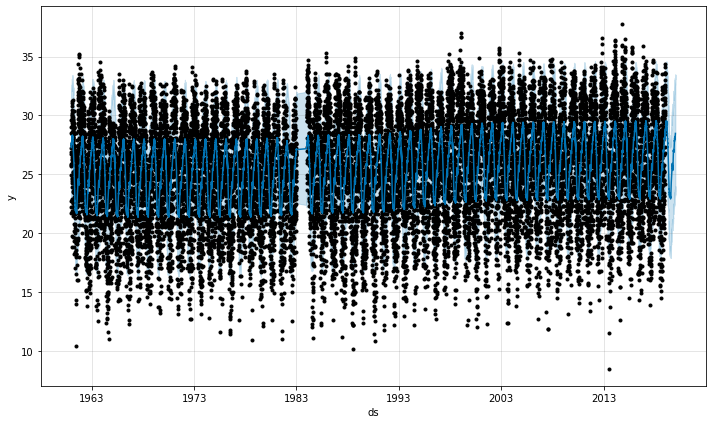

In [9]:
fig1 = m.plot(forecast)

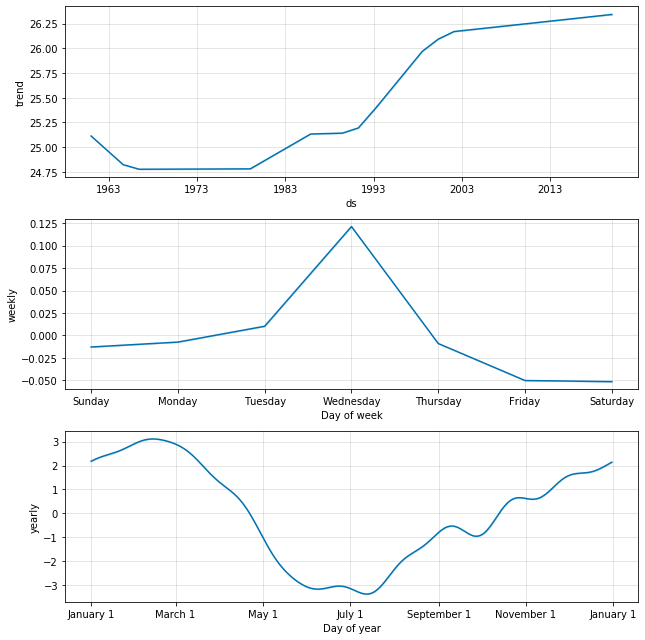

In [10]:
fig2 = m.plot_components(forecast)